Hackathon Subject 2: Analyzing Medical Insurance Costs
Description:

In this hackathon, you are tasked with analyzing medical insurance costs based on various factors such as age, gender, BMI, number of dependents, smoking habits, and residential region. As a data analyst working in the health insurance sector, your goal is to explore the “Medical Cost Personal Datasets” to uncover patterns and insights that could inform pricing strategies, risk assessment, and personalized health care planning.

This dataset allows you to investigate the relationships between demographic and lifestyle factors with medical expenses, offering valuable insights into the key drivers of insurance costs.

Data source: Medical Cost Personal Datasets

Key Tasks:

Exploratory Data Analysis (EDA):

Perform a comprehensive analysis of the dataset to understand the distribution of variables and identify any correlations between features such as age, BMI, smoking status, and medical costs (charges).
Use descriptive statistics and visualizations to summarize the data and highlight any interesting trends or outliers.
Data Preprocessing:

Handle missing data and perform any necessary data cleaning.
Apply normalization or standardization to numerical features like age, bmi, and charges to prepare them for analysis.
Encode categorical variables such as sex, smoker, and region to facilitate further analysis.
Feature Exploration:

Explore the impact of different features on medical costs, focusing on key variables like BMI, smoking status, and the number of dependents.
Investigate potential interactions between variables and how they influence insurance charges using correlation matrix and graphs.
Visualization:

Use Matplotlib and Seaborn to create visualizations that effectively communicate your findings. Examples might include scatter plots, box plots, heatmaps, and bar charts. You can also directly create them on Tableau or PowerBI.
Optionally, develop an interactive dashboard using Tableau or PowerBI to allow stakeholders to explore the data and insights dynamically.
Bonus: Regional Analysis:

Conduct a detailed analysis of how medical costs vary by region (northeast, southeast, southwest, northwest).
Identify any regional trends in medical expenses and suggest reasons for these variations.
Deliverables:

Participants are expected to submit a comprehensive report detailing their exploratory data analysis, data preprocessing steps, and key insights. Additionally, a presentation should be prepared to showcase the visualizations and conclusions. An interactive dashboard is optional but can enhance the presentation of results.

Evaluation Criteria:

Judges will assess submissions based on the depth of analysis, creativity in data exploration, the clarity and effectiveness of visualizations, and the overall quality of insights and recommendations derived from the data.



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [4]:
# Load the dataset to examine its structure and initial contents
insurance_data = pd.read_csv("/content/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Checking for missing values
print("\nChecking for missing values in each column:")
print(insurance_data.isnull().sum())



Checking for missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
# Encoding categorical variables
# The categorical variables are 'sex', 'smoker', and 'region'. Encoding these into numerical form.
# 'sex': Male = 1, Female = 0
# For 'region', we will use one-hot encoding.
encoded_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)


In [7]:
#Normalize numerical features
# We will normalize 'age', 'bmi', and 'charges' to standardize the scale of these features.
scaler = StandardScaler()
normalized_columns = ['age', 'bmi', 'charges']
encoded_data[normalized_columns] = scaler.fit_transform(encoded_data[normalized_columns])
print("\nCleaned and Encoded Dataset Preview:")
print(encoded_data.head())



Cleaned and Encoded Dataset Preview:
        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.438764 -0.453320         0  0.298584     False        True   
1 -1.509965  0.509621         1 -0.953689      True       False   
2 -0.797954  0.383307         3 -0.728675      True       False   
3 -0.441948 -1.305531         0  0.719843      True       False   
4 -0.513149 -0.292556         0 -0.776802      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


<ipython-input-8-68a994544335>:30: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


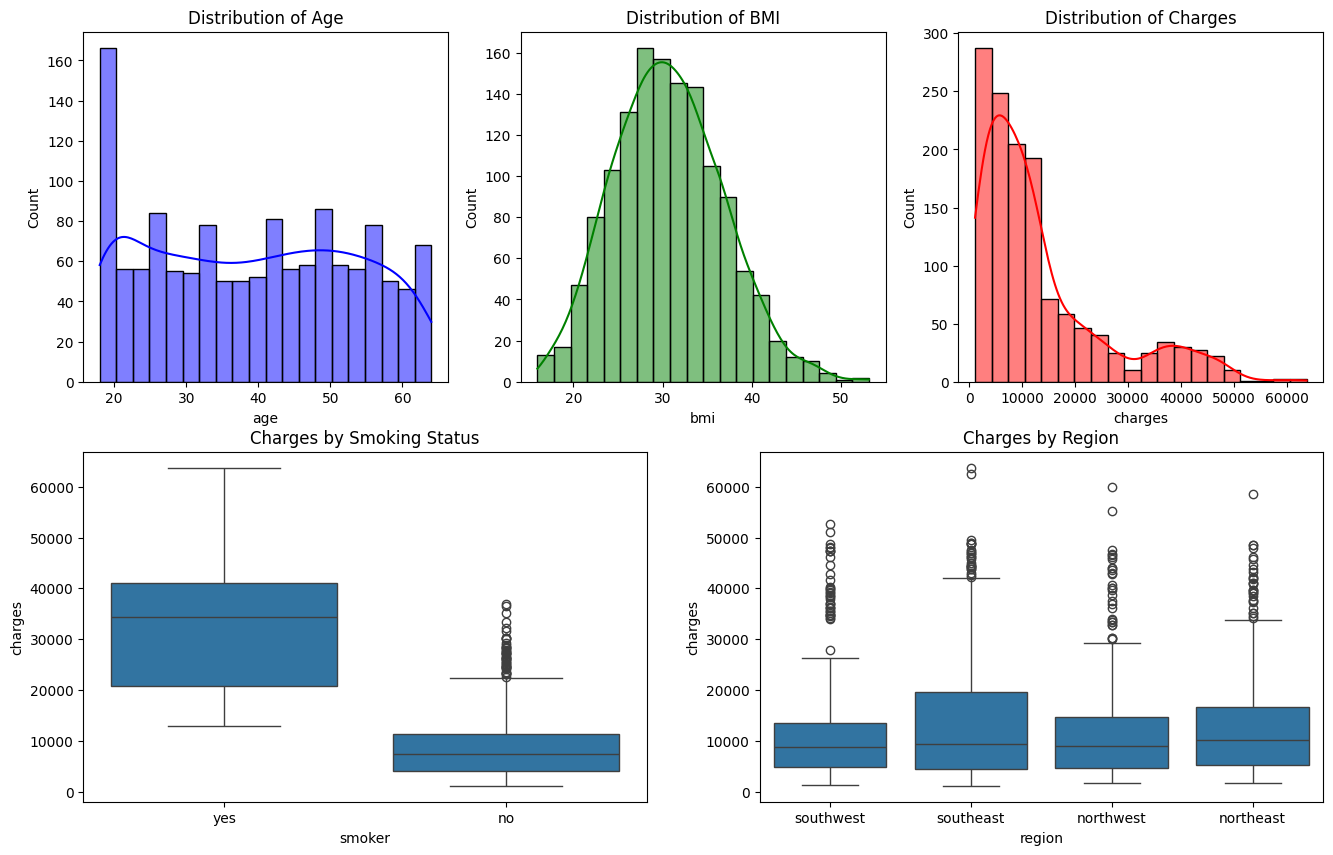

In [8]:
#Exploratory Data Analysis (EDA)
# Visualizing distributions of age, BMI, and charges
plt.figure(figsize=(16, 10))

# Age distribution
plt.subplot(2, 3, 1)
sns.histplot(insurance_data['age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age')

# BMI distribution
plt.subplot(2, 3, 2)
sns.histplot(insurance_data['bmi'], kde=True, bins=20, color='green')
plt.title('Distribution of BMI')

# Charges distribution
plt.subplot(2, 3, 3)
sns.histplot(insurance_data['charges'], kde=True, bins=20, color='red')
plt.title('Distribution of Charges')

# Boxplot: Charges by Smoking Status
plt.subplot(2, 2, 3)
sns.boxplot(x='smoker', y='charges', data=insurance_data)
plt.title('Charges by Smoking Status')

# Boxplot: Charges by Region
plt.subplot(2, 2, 4)
sns.boxplot(x='region', y='charges', data=insurance_data)
plt.title('Charges by Region')

plt.tight_layout()
plt.show()


The visualizations show several interesting insights:

### 1. Age Distribution: The dataset contains a fairly even distribution of ages, with a slight peak in the younger adult range (around 20-25 years old).
### 2. BMI Distribution: The BMI values follow a normal distribution, with most individuals having a BMI between 25 and 35. This range aligns with the overweight to obese categories, which could have implications for health risks and costs.
### 3. Charges Distribution: Medical charges are highly right-skewed, with a majority of individuals incurring relatively low costs, while a smaller portion face extremely high charges.
### 4. Charges by Smoking Status: Smokers tend to have significantly higher medical expenses than non-smokers, indicating a strong correlation between smoking and higher medical costs.

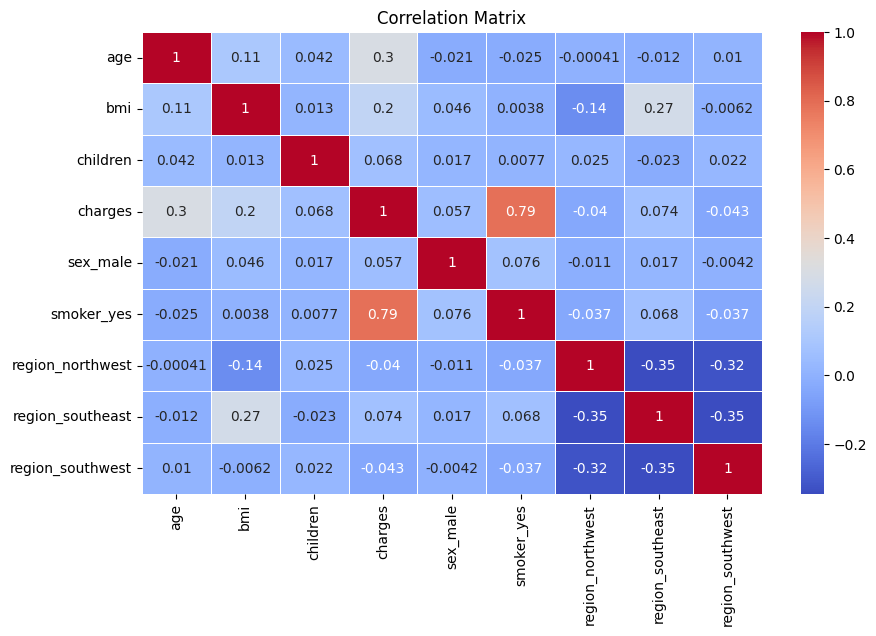

In [14]:
# Correlation Analysis
# Calculate the correlation matrix to explore relationships between variables.
correlation_matrix = encoded_data.corr()

# Step 10: Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Conclusion for Regional analysis:
### 1. The boxplot shows that while there is variation in medical costs across regions, the distribution and spread of costs are fairly similar. The Southeast region tends to have a slightly higher proportion of high-cost individuals (indicated by the larger spread in the boxplot).
### 2. The mean medical charges are highest in the Southeast, followed by the Northeast, Northwest, and Southwest.
### 3. The Southeast region's higher average costs could be attributed to a higher proportion of smokers and individuals with higher BMIs, factors that significantly increase medical costs.
### 4. The Southwest region shows the lowest average medical costs, possibly due to lower smoking rates or better access to preventive care.
### 5. Regional policies, socioeconomic conditions, and lifestyle differences may contribute to these trends.


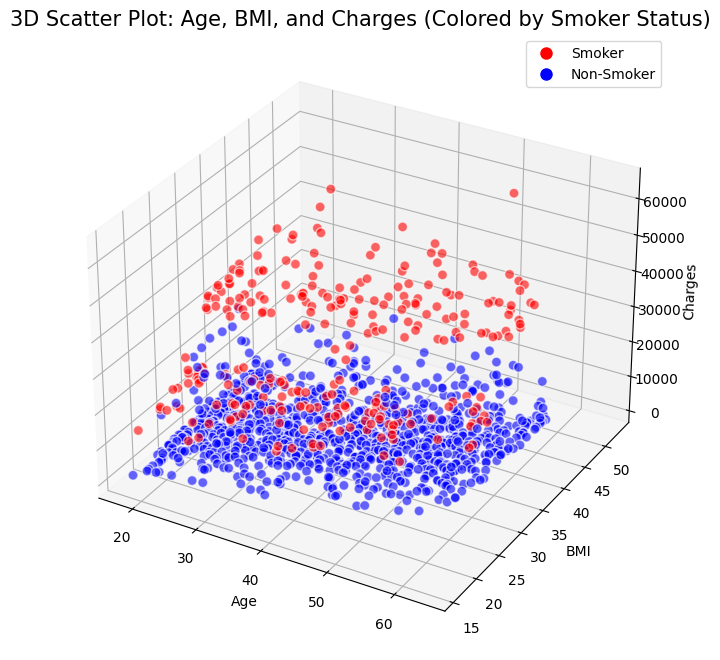

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Prepare the data for 3D plotting
# We'll use 'age', 'bmi', and 'charges' as the x, y, and z axes, respectively.
# We can color the points based on smoker status.

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Map smoker status to colors (1 for smoker, 0 for non-smoker)
colors = insurance_data['smoker'].map({'yes': 'red', 'no': 'blue'})

# 3D scatter plot of Age, BMI, and Charges, colored by Smoking Status
scatter = ax.scatter(insurance_data['age'],
                     insurance_data['bmi'],
                     insurance_data['charges'],
                     c=colors, s=50, alpha=0.6, edgecolor='w')

# Customizing the aesthetics of the plot
ax.set_title('3D Scatter Plot: Age, BMI, and Charges (Colored by Smoker Status)', fontsize=15)
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')

# Adding a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Smoker',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Non-Smoker',
                          markerfacecolor='blue', markersize=10)]
ax.legend(handles=legend_elements)

plt.show()

###Acquired insights:
### 1. This visualization makes it easy to spot high-cost individuals (with high charges on the z-axis) and shows how smokers (in red) tend to be among those with the highest medical costs.
### 2.We can also observe trends such as how older individuals with higher BMI are more likely to incur higher medical charges, particularly for smokers.


# Wide Conclusion for All Acquired Insights:

After analyzing the dataset of medical insurance costs, we discovered several critical insights across different factors influencing medical charges. Here's a broad overview of all key findings:

1. **Age Distribution**: The dataset shows an even distribution of ages, with a concentration of younger adults. This suggests that a wide age range is represented, but the young adult demographic is slightly more prominent.
   
2. **BMI Distribution**: Most individuals fall between a BMI of 25 and 35, which indicates a prevalence of overweight to obese individuals. This finding is important because higher BMI is associated with increased health risks, which could lead to higher medical costs.

3. **Charges Distribution**: The distribution of medical charges is heavily skewed, meaning most individuals incur low to moderate costs, while a smaller group faces significantly higher charges. This skewness reflects the disproportionate impact that high-risk individuals (e.g., smokers or those with high BMI) have on overall medical costs.

4. **Smoking and Charges**: Smoking is a major factor contributing to increased medical costs. Smokers consistently incur higher expenses, which is further supported by the high correlation between smoking status and medical charges. This underscores the importance of lifestyle factors in healthcare costs.

5. **Regional Differences**: The regional analysis revealed that the **Southeast** region has the highest medical costs, while the **Southwest** has the lowest. This disparity may stem from differences in smoking rates, obesity levels, access to healthcare, and socioeconomic conditions. Regions with higher costs might require targeted health policies and preventive care strategies to manage medical expenses.

6. **Interaction of Age, BMI, and Smoking**: The 3D visualizations showed a clear trend: older individuals with higher BMI tend to incur higher medical charges, especially smokers. These interactions between age, BMI, and smoking create a risk profile that strongly predicts elevated healthcare costs.




Wide Conclusion for All Acquired Insights:
After analyzing the dataset of medical insurance costs, I discovered several critical insights across different factors influencing medical charges. Here's a broad overview of all key findings:
1. Age Distribution**: The dataset shows an even distribution of ages, with a concentration of younger adults. This suggests that a wide age range is represented, but the young adult demographic is slightly more prominent.
2.  **BMI Distribution**: Most individuals fall between a BMI of 25 and 35, which indicates a prevalence of overweight to obese individuals. This finding is important because higher BMI is associated with increased health risks, which could lead to higher medical costs.
3.  **Charges Distribution**: The distribution of medical charges is heavily skewed, meaning most individuals incur low to moderate costs, while a smaller group faces significantly higher charges. This skewness reflects the disproportionate impact that high-risk individuals (e.g., smokers or those with high BMI) have on overall medical costs.
4. **Smoking and Charges**: Smoking is a major factor contributing to increased medical costs. Smokers consistently incur higher expenses, which is further supported by the high correlation between smoking status and medical charges. This underscores the importance of lifestyle factors in healthcare costs.
5. **Regional Differences**: The regional analysis revealed that the **Southeast** region has the highest medical costs, while the **Southwest** has the lowest. This disparity may stem from differences in smoking rates, obesity levels, access to healthcare, and socioeconomic conditions. Regions with higher costs might require targeted health policies and preventive care strategies to manage medical expenses.
6. **Interaction of Age, BMI, and Smoking**: The 3D visualizations showed a clear trend: older individuals with higher BMI tend to incur higher medical charges, especially smokers. These interactions between age, BMI, and smoking create a risk profile that strongly predicts elevated healthcare costs.


# Final Resume and Insights:

- **Lifestyle factors** such as smoking and obesity play a critical role in determining healthcare costs. Prevention strategies focused on smoking cessation and weight management could significantly reduce costs.
- **Regional variations** in medical expenses suggest that targeted health interventions might be necessary in high-cost areas like the Southeast, where a higher proportion of smokers and individuals with higher BMIs contribute to increased expenses.
- The **age-BMI-charges interaction** is a key insight for personalized health care planning, as older individuals with higher BMIs are more prone to incurring higher medical costs, particularly if they smoke.
